<img src="./images/banner.png" width="800">

# K-Means Clustering

K-Means clustering is one of the most popular and widely used unsupervised machine learning algorithms. It's a simple yet powerful method for partitioning a dataset into K distinct, non-overlapping subgroups (clusters) where each data point belongs to only one group.


K-Means clustering is a centroid-based algorithm, where K represents the number of clusters we choose to partition our data into. The algorithm works by identifying K centroids (center points) in the data and then iteratively refining the positions of these centroids to minimize the distance between the data points and their assigned centroids.


<img src="./images/clustering.webp" width="800">

💡 **Tip:** Think of K-Means as a way to group similar data points together, much like sorting a basket of mixed fruits into separate piles based on their type.


K-Means is based on the following key concepts:

1. **Centroids:** These are the heart of the K-Means algorithm. A centroid is the arithmetic mean position of all the points in a cluster. Initially, these are randomly placed, but their positions are optimized through iterations.

2. **Clusters:** Groups of data points that are more similar to each other than to those in other clusters. In K-Means, similarity is often measured by the Euclidean distance between points.

3. **Iterations:** The process of assigning points to clusters and updating centroids is repeated until convergence (when centroids stop moving significantly).


The objective of K-Means is to minimize the sum of squared distances between all points and their assigned cluster centers. Mathematically, it aims to minimize the following function:

$J = \sum_{i=1}^{n} \sum_{k=1}^{K} w_{ik} \|x_i - \mu_k\|^2$

Where:
- $J$ is the objective function to minimize
- $n$ is the number of data points
- $K$ is the number of clusters
- $w_{ik}$ is 1 if point $x_i$ is in cluster $k$, and 0 otherwise
- $\mu_k$ is the centroid of cluster $k$
- $\|x_i - \mu_k\|^2$ is the squared Euclidean distance between $x_i$ and $\mu_k$


K-Means clustering is popular for several reasons:

1. **Simplicity:** The algorithm is straightforward to understand and implement.
2. **Efficiency:** It's computationally quick and works well for large datasets.
3. **Flexibility:** It can be applied to a wide range of data types and problem domains.


❗️ **Important Note:** While K-Means is versatile, it assumes that clusters are spherical and equally sized, which may not always be the case in real-world data.


K-Means clustering finds applications in various fields:

1. **Customer Segmentation:** Grouping customers based on purchasing behavior.
2. **Image Compression:** Reducing the number of colors in an image.
3. **Anomaly Detection:** Identifying unusual data points that don't fit into any cluster.
4. **Document Classification:** Grouping similar documents in large text datasets.


By understanding these fundamental concepts, we lay the groundwork for diving deeper into the mechanics of the K-Means algorithm and its practical implementation.

**Table of contents**<a id='toc0_'></a>    
- [The K-Means Algorithm](#toc1_)    
  - [Initialization](#toc1_1_)    
  - [Assignment Step](#toc1_2_)    
  - [Update Step](#toc1_3_)    
  - [Convergence Check](#toc1_4_)    
  - [Intuitive Explanation](#toc1_5_)    
  - [Complexity and Efficiency](#toc1_6_)    
  - [Visualizing K-Means](#toc1_7_)    
- [Choosing the Optimal K](#toc2_)    
  - [The Importance of Choosing K](#toc2_1_)    
  - [Methods for Determining K](#toc2_2_)    
    - [Elbow Method](#toc2_2_1_)    
    - [Silhouette Analysis](#toc2_2_2_)    
    - [Gap Statistic](#toc2_2_3_)    
    - [Cross-Validation](#toc2_2_4_)    
  - [Practical Considerations](#toc2_3_)    
  - [Balancing Act](#toc2_4_)    
- [Strengths and Limitations of K-Means](#toc3_)    
  - [Strengths of K-Means](#toc3_1_)    
  - [Limitations of K-Means](#toc3_2_)    
  - [Balancing Strengths and Limitations](#toc3_3_)    
- [Advanced Variations of K-Means](#toc4_)    
  - [K-Means++](#toc4_1_)    
  - [Mini-Batch K-Means](#toc4_2_)    
  - [Fuzzy C-Means (FCM)](#toc4_3_)    
  - [Kernel K-Means](#toc4_4_)    
  - [Spherical K-Means](#toc4_5_)    
  - [Bisecting K-Means](#toc4_6_)    
  - [X-Means](#toc4_7_)    
  - [Online K-Means](#toc4_8_)    
  - [Comparative Analysis](#toc4_9_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The K-Means Algorithm](#toc0_)

The K-Means algorithm is an iterative process that aims to partition n observations into K clusters. Each observation belongs to the cluster with the nearest mean (cluster centroid). The algorithm works by minimizing the within-cluster sum of squares, effectively creating compact and separated clusters.


Let's break down the K-Means algorithm into its core steps:

1. **Initialization**
2. **Assignment Step**
3. **Update Step**
4. **Convergence Check**


### <a id='toc1_1_'></a>[Initialization](#toc0_)


The algorithm begins by selecting K initial centroids. There are several methods for this:

- **Random Initialization:** Randomly select K data points as initial centroids.
- **Forgy Method:** Randomly assign a cluster to each data point and compute means.
- **K-Means++:** A smarter initialization that spreads out initial centroids.


💡 **Tip:** The choice of initialization can significantly impact the final results. K-Means++ often leads to better outcomes and faster convergence.


### <a id='toc1_2_'></a>[Assignment Step](#toc0_)


In this step, each data point is assigned to its nearest centroid. Mathematically, we're minimizing the distance between each point and the centroids:

$C_i = \{x_p : \|x_p - m_i\|^2 \leq \|x_p - m_j\|^2 \;\forall j, 1 \leq j \leq k\}$

Where:
- $C_i$ is the $i$th cluster
- $x_p$ is a data point
- $m_i$ is the centroid of the $i$th cluster


Intuitively, we're saying: "For each data point, which centroid is it closest to?" We then group all points closest to a particular centroid into one cluster.


### <a id='toc1_3_'></a>[Update Step](#toc0_)


After assigning all points, we recalculate the positions of the K centroids. The new centroid of each cluster becomes the arithmetic mean of all data points in that cluster:

$m_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$

Where $|C_i|$ is the number of points in cluster $i$.


Think of this as "moving" the centroid to the center of mass of its assigned points. This step aims to find a more optimal position for each centroid based on its current cluster members.


### <a id='toc1_4_'></a>[Convergence Check](#toc0_)


After updating the centroids, we check if the algorithm has converged. Convergence typically means either:

- The centroids have stopped moving significantly.
- The assignments of data points to clusters no longer change.


If not converged, we repeat steps 2 and 3. If converged, we end the algorithm.


### <a id='toc1_5_'></a>[Intuitive Explanation](#toc0_)


Imagine you're organizing a large conference with attendees spread across a city. You need to choose K hotel locations to minimize overall travel distance:

1. **Initialization:** Randomly select K initial hotel locations.
2. **Assignment:** Assign each attendee to the nearest hotel.
3. **Update:** For each hotel, find the average location of its assigned attendees and move the hotel there.
4. **Convergence:** Repeat 2-3 until the hotels stop moving significantly.


This process naturally forms clusters of attendees around optimally placed hotels.


### <a id='toc1_6_'></a>[Complexity and Efficiency](#toc0_)


The time complexity of K-Means is generally $O(n * K * I * d)$, where:
- $n$ is the number of data points
- $K$ is the number of clusters
- $I$ is the number of iterations
- $d$ is the number of dimensions


While this may seem high, K-Means is often fast in practice because:
1. The number of iterations, $I$, is often small and can be capped.
2. For many datasets, $K$ and $d$ are much smaller than $n$.


❗️ **Important Note:** K-Means can converge to a local optimum. Running the algorithm multiple times with different initializations can help find a better global solution.


### <a id='toc1_7_'></a>[Visualizing K-Means](#toc0_)

To truly understand K-Means, it's helpful to visualize it. Imagine a 2D scatter plot:

1. Initial random centroids appear as distinct colors.
2. Points are colored based on their nearest centroid.
3. Centroids move to the mean position of their colored points.
4. Colors shift as points are reassigned to new nearest centroids.
5. The process repeats until stability.


The algorithm is concisely illustrated by the GIF below. We also see total within-cluster sum of squares (WCSS) decreasing over iterations. WCSS is the sum of the squared distances between each point and its centroid and is a measure of the clustering quality. We will see more on this later.

<img src="./images/kmeans.gif" width="600">


By understanding these mechanics, we can appreciate both the simplicity and power of the K-Means algorithm. In the next section, we'll explore how to choose the optimal number of clusters, K, a critical aspect of applying K-Means effectively.

## <a id='toc2_'></a>[Choosing the Optimal K](#toc0_)

Selecting the right number of clusters (K) is crucial for the effectiveness of K-Means clustering. This choice significantly impacts the quality and interpretability of the results. While there's no universally perfect method to determine K, several techniques can guide this decision.


### <a id='toc2_1_'></a>[The Importance of Choosing K](#toc0_)


The choice of K directly influences:

1. **Cluster Granularity:** Too few clusters may overlook important subgroups, while too many can lead to overfitting.
2. **Interpretability:** The clusters should make sense in the context of your data and problem.
3. **Performance:** Both computational efficiency and the quality of results depend on K.


💡 **Tip:** Start with a rough estimate based on domain knowledge, then refine using quantitative methods.


### <a id='toc2_2_'></a>[Methods for Determining K](#toc0_)


#### <a id='toc2_2_1_'></a>[Elbow Method](#toc0_)


The Elbow Method is one of the most popular techniques for finding the optimal K.


**How it works:**
1. Run K-Means for a range of K values (e.g., 1 to 10).
2. For each K, calculate the sum of squared distances (inertia) between data points and their assigned cluster centroids.
3. Plot K against the inertia.
4. Look for an "elbow" in the plot – a point where the rate of decrease sharply shifts.


**Interpreting the Elbow Plot:**
- The inertia decreases as K increases (more clusters always reduce intra-cluster distances).
- The optimal K is often at the "elbow" point, where adding more clusters doesn't significantly decrease inertia.


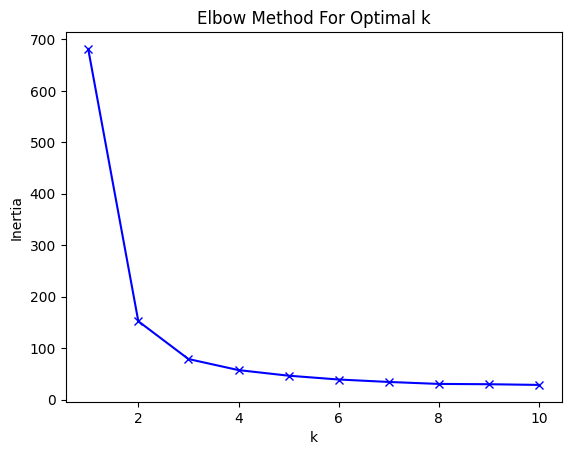

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

❗️ **Important Note:** The elbow may not always be clear-cut. In such cases, consider using this method in conjunction with others.


#### <a id='toc2_2_2_'></a>[Silhouette Analysis](#toc0_)


Silhouette analysis measures how similar an object is to its own cluster compared to other clusters.


**The Silhouette Score:**
- Ranges from -1 to 1.
- Higher values indicate better-defined clusters.


**How to use:**
1. Compute the average silhouette score for different K values.
2. Choose the K that maximizes the average silhouette score.


In [3]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

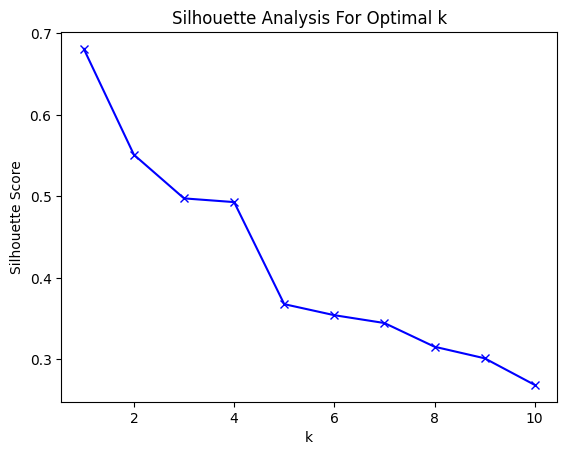

In [4]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k+1, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

#### <a id='toc2_2_3_'></a>[Gap Statistic](#toc0_)


Gap statistics is a method used in k-means clustering to determine the optimal number of clusters (k) for a given dataset. Introduced by Robert Tibshirani, Guenther Walther, and Trevor Hastie in 2001, it compares the within-cluster dispersion of the actual data to that of a reference distribution.

Here is how it works:
1. For each potential number of clusters k (usually from 1 to some upper limit):
   - Apply k-means clustering to the actual data
   - Generate reference datasets (usually using uniform distribution)
   - Apply k-means clustering to each reference dataset
   - Calculate the gap statistic

2. Choose the optimal k based on the largest gap statistic or using the "elbow method" on the gap statistic curve


The gap statistic for a given k is calculated as:
$$Gap(k) = E[\log(W_{k_{ref}})] - \log(W_k)$$
Where:
- $W_k$ is the within-cluster dispersion for the actual data with k clusters
- $W_{k_{ref}}$ is the within-cluster dispersion for the reference data with k clusters
- $E[\log(W_{k_{ref}})]$ is the expected value of $\log(W_{k_{ref}})$ over multiple reference datasets

The within-cluster dispersion ($W_k$) is calculated as the sum of pairwise distances for all points within each cluster, summed over all clusters.

The reference distribution is typically a uniform distribution over the range of the actual data. Multiple reference datasets are generated to get a stable estimate of $E[\log(W_{k_{ref}})]$.

The optimal number of clusters is often chosen as the smallest k such that:
$$Gap(k) \geq Gap(k+1) - s_{k+1}$$
Where $s_{k+1}$ is the standard error of $\log(W_{k+1_{ref}})$.


Here are some advantages of Gap Statistics:
1. Provides a systematic way to determine the optimal number of clusters
2. Works well for datasets with well-separated clusters
3. Can handle high-dimensional data


However, it has some limitations:
1. Can be computationally expensive, especially for large datasets or high-dimensional data
2. The choice of reference distribution can affect the results
3. May not perform well for datasets with overlapping clusters or non-spherical cluster shapes


Example 1: 2D Dataset

Original Data:
- x: ranges from 0 to 10
- y: ranges from -5 to 5


To generate a reference dataset:
1. For x: Generate random values uniformly between 0 and 10
2. For y: Generate random values uniformly between -5 and 5


Example reference data points:
- Point 1: (3.7, -2.1)
- Point 2: (8.2, 4.3)
- Point 3: (1.5, 0.8)


By comparing your actual data to these reference datasets, you can determine how much better your data clusters compared to random noise, which is the core idea behind the gap statistic.

**Process:**
1. Cluster the observed data for different K values.
2. Generate reference datasets with no obvious clustering.
3. Compute the gap between the clustered data and the reference data.
4. Choose K where the gap statistic is largest.


This method is particularly useful when the elbow is not clear.


#### <a id='toc2_2_4_'></a>[Cross-Validation](#toc0_)


For a more rigorous approach, especially with larger datasets:

1. Split your data into training and validation sets.
2. Run K-Means with different K values on the training data.
3. Evaluate each model's performance on the validation set.
4. Choose K that performs best on the validation data.


### <a id='toc2_3_'></a>[Practical Considerations](#toc0_)


When choosing K, also consider:

1. **Domain Knowledge:** Sometimes, the number of clusters might be suggested by the nature of your problem.

2. **Visualization:** For low-dimensional data, visualizing clusters can provide intuition about a reasonable K.

3. **Computational Resources:** Very large K values might be impractical for large datasets.

4. **Purpose of Clustering:** The optimal K might differ depending on whether you're using clustering for data compression, anomaly detection, or customer segmentation.


### <a id='toc2_4_'></a>[Balancing Act](#toc0_)


Choosing K is often a balance between:
- **Underfitting:** Too few clusters fail to capture the structure of the data.
- **Overfitting:** Too many clusters may capture noise rather than true patterns.


💡 **Tip:** It's often beneficial to try multiple methods and compare their suggestions. If different methods suggest similar K values, it increases confidence in your choice.


By applying these methods and considerations, you can make an informed decision about the optimal number of clusters for your K-Means analysis. Remember, the "best" K is context-dependent and should align with your specific goals and data characteristics.

## <a id='toc3_'></a>[Strengths and Limitations of K-Means](#toc0_)

K-Means clustering is a widely used algorithm in data science and machine learning. Like any method, it has its strengths that make it popular, as well as limitations that are important to understand. Let's explore both aspects to gain a comprehensive view of when and how to use K-Means effectively.


### <a id='toc3_1_'></a>[Strengths of K-Means](#toc0_)


1. **Simplicity and Intuitiveness**

K-Means is straightforward to understand and implement, making it accessible to both beginners and experienced practitioners.

- **Conceptual Clarity:** The idea of grouping data points around centroids is intuitive.
- **Easy Implementation:** Many libraries offer robust implementations, allowing quick application.


2. **Efficiency and Scalability**

K-Means performs well on large datasets, making it suitable for many real-world applications.

- **Linear Time Complexity:** Generally runs in $O(n * K * I * d)$ time, which is often practically linear in n for fixed K, I, and d.
- **Memory Efficient:** Requires space proportional to $(n + K)d$, which is linear in the input size.


💡 **Tip:** For very large datasets, consider using mini-batch K-Means, which trades a bit of cluster quality for significantly reduced computation time.


3. **Flexibility**

K-Means can be adapted and extended in various ways:

- **Feature Scaling:** Can work with different feature scales when proper normalization is applied.
- **Initialization Methods:** Techniques like K-Means++ can improve convergence and results.
- **Soft Clustering Extensions:** Fuzzy C-Means allows for probabilistic cluster assignments.


4. **Guaranteed Convergence**


The algorithm is guaranteed to converge to a local optimum, ensuring that it will always produce a result.


In [8]:
# Example of K-Means convergence
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)
data = np.random.rand(1000, 2)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

print(f"Converged in {kmeans.n_iter_} iterations")

Converged in 20 iterations


### <a id='toc3_2_'></a>[Limitations of K-Means](#toc0_)


1. **Sensitivity to Initial Centroids**

The algorithm's results can vary significantly based on the initial centroid positions.

- **Local Optima:** K-Means may converge to suboptimal solutions depending on initialization.
- **Instability:** Different runs can produce different results.


❗️ **Important Note:** Always run K-Means multiple times with different initializations to mitigate this issue.


2. **Predefined Number of Clusters**

K-Means requires the number of clusters (K) to be specified beforehand.

- **Challenge in Real-world Scenarios:** The optimal number of clusters is often not known a priori.
- **Potential for Misuse:** Incorrect choice of K can lead to meaningless results.


3. **Assumption of Spherical Clusters**

K-Means assumes that clusters are spherical and equally sized, which may not reflect reality.

- **Limitation with Complex Shapes:** Struggles with non-globular cluster shapes.
- **Sensitivity to Outliers:** Outliers can significantly skew centroid positions.


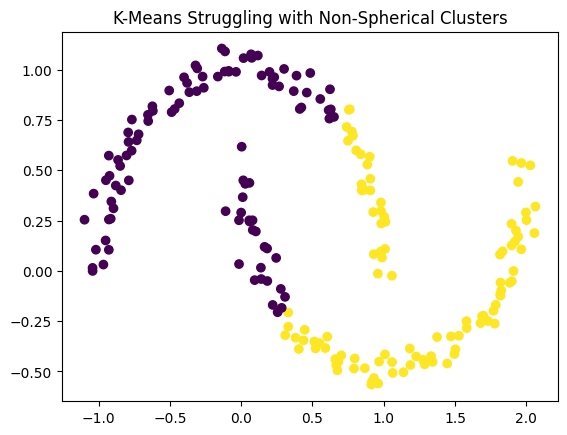

In [7]:
# Visualizing K-Means limitation with non-spherical clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Struggling with Non-Spherical Clusters")
plt.show()

4. **Curse of Dimensionality**


As the number of dimensions increases, the effectiveness of K-Means can decrease.

- **Distance Measure Becomes Less Meaningful:** In high dimensions, the concept of distance becomes less intuitive.
- **Computational Complexity:** Increases with the number of dimensions.


5. **Handling Categorical Data**

K-Means is designed for numerical data and doesn't naturally handle categorical variables.

- **Need for Preprocessing:** Categorical data must be encoded numerically, which can be challenging.
- **Loss of Interpretability:** Encoding can sometimes lead to loss of clear interpretation of cluster centroids.


### <a id='toc3_3_'></a>[Balancing Strengths and Limitations](#toc0_)


To make the most of K-Means while mitigating its limitations:

1. **Initialization Strategy:** Use K-Means++ or multiple random initializations.
2. **Feature Engineering:** Carefully select and preprocess features to ensure they are meaningful for clustering.
3. **Dimensionality Reduction:** Consider PCA or t-SNE before clustering high-dimensional data.
4. **Cluster Validation:** Use methods like silhouette analysis to validate cluster quality.
5. **Alternative Algorithms:** Consider DBSCAN or Gaussian Mixture Models for non-spherical clusters.


💡 **Tip:** Always visualize your data and clusters when possible. This can provide invaluable insights into the appropriateness of K-Means for your specific dataset.


By understanding these strengths and limitations, you can make informed decisions about when and how to apply K-Means clustering effectively in your data analysis projects. Remember, no single clustering algorithm is perfect for all situations, and K-Means is a powerful tool when used appropriately and with awareness of its characteristics.

## <a id='toc4_'></a>[Advanced Variations of K-Means](#toc0_)

While the standard K-Means algorithm is widely used, researchers and practitioners have developed several advanced variations to address its limitations and extend its capabilities. These variations aim to improve performance, handle specific data types, or adapt to particular problem domains.


### <a id='toc4_1_'></a>[K-Means++](#toc0_)


K-Means++ is an enhancement to the initialization step of the standard K-Means algorithm.


**How it works:**
1. Choose the first centroid randomly from the data points.
2. For each subsequent centroid, select a data point with probability proportional to its squared distance from the nearest existing centroid.


**Advantages:**
- Improves convergence speed
- Often leads to better clustering results
- Reduces sensitivity to initialization


```python
from sklearn.cluster import KMeans

# Using K-Means++ initialization (default in scikit-learn)
kmeans_plus_plus = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_plus_plus.fit(data)
```


💡 **Tip:** K-Means++ is often the default initialization in many libraries due to its superior performance.


### <a id='toc4_2_'></a>[Mini-Batch K-Means](#toc0_)


Mini-Batch K-Means is designed for large datasets where standard K-Means might be computationally expensive.


**How it works:**
1. Use small random batches of data to update the centroids.
2. Converge faster with slightly worse cluster quality.


**Advantages:**
- Significantly faster for large datasets
- Useful for online learning scenarios


```python
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=1000, random_state=42)
minibatch_kmeans.fit(large_dataset)
```


### <a id='toc4_3_'></a>[Fuzzy C-Means (FCM)](#toc0_)


Fuzzy C-Means is a soft clustering variation where each data point can belong to multiple clusters with varying degrees of membership.


**Key Concepts:**
- Membership matrix: Indicates the degree to which each point belongs to each cluster.
- Fuzziness parameter: Controls the degree of cluster fuzziness.


**Advantages:**
- More flexible for overlapping clusters
- Provides more nuanced cluster assignments


❗️ **Important Note:** FCM requires more computational resources and can be sensitive to the choice of fuzziness parameter.


### <a id='toc4_4_'></a>[Kernel K-Means](#toc0_)


Kernel K-Means applies the kernel trick to map data into a higher-dimensional space before clustering.


**How it works:**
1. Transform data using a kernel function (e.g., RBF kernel).
2. Perform K-Means in the transformed space.


**Advantages:**
- Can find non-linearly separable clusters
- Useful for complex data structures


### <a id='toc4_5_'></a>[Spherical K-Means](#toc0_)


Spherical K-Means is designed for directional data, where the magnitude of vectors is not important, only their direction.


**Key Features:**
- Uses cosine similarity instead of Euclidean distance
- Normalizes data points to lie on a unit sphere


**Applications:**
- Text clustering
- Gene expression analysis


### <a id='toc4_6_'></a>[Bisecting K-Means](#toc0_)


Bisecting K-Means is a hierarchical variant of K-Means.


**Algorithm:**
1. Start with all points in a single cluster.
2. Pick a cluster to split.
3. Use 2-means to split the chosen cluster.
4. Repeat steps 2-3 until K clusters are obtained.


**Advantages:**
- Can produce a hierarchical structure of clusters
- Often results in more balanced cluster sizes


### <a id='toc4_7_'></a>[X-Means](#toc0_)


X-Means aims to automatically determine the optimal number of clusters.


**How it works:**
1. Start with a minimum number of clusters.
2. Iteratively split clusters and evaluate using a criterion like BIC (Bayesian Information Criterion).
3. Stop when splitting no longer improves the criterion.


**Advantage:**
- Addresses the challenge of choosing K in standard K-Means


### <a id='toc4_8_'></a>[Online K-Means](#toc0_)


Online K-Means is designed for streaming data where not all data points are available at once.


**Key Features:**
- Updates centroids incrementally as new data arrives
- Useful for real-time or big data scenarios


### <a id='toc4_9_'></a>[Comparative Analysis](#toc0_)


Here's a quick comparison of these variations:

| Variation | Main Advantage | Best Use Case |
|-----------|----------------|---------------|
| K-Means++ | Better initialization | General improvement over standard K-Means |
| Mini-Batch K-Means | Scalability | Very large datasets |
| Fuzzy C-Means | Soft clustering | Overlapping clusters |
| Kernel K-Means | Non-linear separation | Complex cluster shapes |
| Spherical K-Means | Directional data | Text or gene data |
| Bisecting K-Means | Hierarchical structure | When cluster hierarchy is needed |
| X-Means | Automatic K selection | Uncertain number of clusters |
| Online K-Means | Streaming data | Real-time applications |


💡 **Tip:** Experiment with different variations based on your specific data characteristics and problem requirements. No single variation is universally best.


By understanding these advanced variations, you can choose the most appropriate version of K-Means for your specific clustering tasks, potentially achieving better results or handling challenging datasets more effectively.

## <a id='toc5_'></a>[Summary](#toc0_)

K-Means clustering is a fundamental and widely-used unsupervised learning algorithm that has proven its value across various domains. Let's recap the key points we've covered in this comprehensive exploration of K-Means:

1. **Core Concept:** K-Means partitions data into K clusters by iteratively assigning points to the nearest centroid and updating centroid positions.

2. **Algorithm Steps:**
   - Initialize K centroids
   - Assign points to nearest centroids
   - Update centroid positions
   - Repeat until convergence

3. **Choosing K:** Selecting the optimal number of clusters is crucial. Methods include:
   - Elbow Method
   - Silhouette Analysis
   - Gap Statistic

4. **Strengths:**
   - Simplicity and intuitive nature
   - Efficiency and scalability
   - Guaranteed convergence

5. **Limitations:**
   - Sensitivity to initialization
   - Assumes spherical clusters
   - Struggles with high-dimensional data

6. **Advanced Variations:**
   - K-Means++ for better initialization
   - Mini-Batch K-Means for large datasets
   - Fuzzy C-Means for soft clustering
   - Kernel K-Means for non-linear separation


In practice, the following considerations are important:
- **Data Preprocessing:** Normalize features to ensure equal weight in distance calculations.
- **Outlier Handling:** Consider removing or treating outliers as they can significantly affect centroid positions.
- **Visualization:** Always visualize results when possible to gain insights and validate clustering.


💡 **Tip:** Remember that K-Means is just one tool in the clustering toolbox. Consider other algorithms like DBSCAN or hierarchical clustering for different data structures.


As data complexity grows, research continues to enhance K-Means and develop new clustering techniques. Stay informed about:

- Advancements in handling high-dimensional data
- Integration with deep learning techniques
- Improvements in automatic cluster number determination


❗️ **Important Note:** The effectiveness of K-Means largely depends on the nature of your data and the specific problem you're trying to solve. Always critically evaluate whether it's the right tool for your task.


By mastering K-Means clustering, including its variations and limitations, you've equipped yourself with a powerful tool for uncovering patterns and structures in data. As you apply this knowledge to real-world problems, remember that the art of clustering often lies in the interpretation of results and the insights they provide to your specific domain.